In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# df['Gender'].value_counts()
# df['Geography'].value_counts()
# df['IsActiveMember'].value_counts()
# df.columns.to_list()
df.shape

(10000, 14)

In [ ]:
#seperating features and labels

x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [ ]:
#cleaning label data

#Scaling


from sklearn.preprocessing import StandardScaler

numerical_cols = ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [ ]:
#Doing hot-endoding on regions

x = pd.get_dummies(x, columns=['Geography'])

In [ ]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,True,False,False
1,-0.440036,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,False,False,True
2,-1.536794,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,True,False,False
3,0.501521,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,True,False,False
4,2.063884,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,Male,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,True,False,False
9996,-1.391939,Male,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,True,False,False
9997,0.604988,Female,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,True,False,False
9998,1.256835,Male,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,False,True,False


In [ ]:
#Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
# x['HasCrcard'] = le.fit_transform(x['HasCrcard'])
# x['IsActiveMember'] = le.fit_transform(x['IsActiveMember'])
x['Geography_France'] = le.fit_transform(x['Geography_France'])
x['Geography_Germany'] = le.fit_transform(x['Geography_Germany'])
x['Geography_Spain'] = le.fit_transform(x['Geography_Spain'])


In [ ]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,0
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,1,0,0
9996,-1.391939,1,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,1,0,0
9997,0.604988,0,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0
9998,1.256835,1,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,0,1,0


In [ ]:
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(8000, 12)

In [ ]:
#import required functions and classes

from tensorflow.keras.models import Sequential    #to implement neutral network as sequence of layers to implement forward and backward propogation
from tensorflow.keras.layers import Dense         #to create nodes of neutal network
from tensorflow.keras.layers import Dropout       #to eliminate useless nodes while model
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU   # Activation functions

In [ ]:
#Early stoping (so i can stop training model when the val_loss become almost constant which means model is not become efficient anymore)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
from tensorflow.keras.models import load_model

classifier = Sequential()


try:
  loaded_ann_model = load_model('/content/drive/MyDrive/Trained Models/ANN_model_for_Bank_leaving_prediction.h5')
  print("ANN model loaded successfully.")
  classifier = loaded_ann_model
except:

  print("Training Ann Model")

  #input layer
  classifier.add(Dense(units=6, activation='relu'))
  # classifier.add(Dropout(0.2))
  #first hiden layer
  classifier.add(Dense(units=64, activation='relu'))
  classifier.add(Dropout(0.3))
  #secong hidden layer
  classifier.add(Dense(units=32, activation='relu'))
  classifier.add(Dropout(0.2))

  #Adding output layer
  classifier.add(Dense(units=1, activation='sigmoid'))

  #Train NN
  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  #giving training Data
  # model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)
  model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

ANN model loaded successfully.


In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

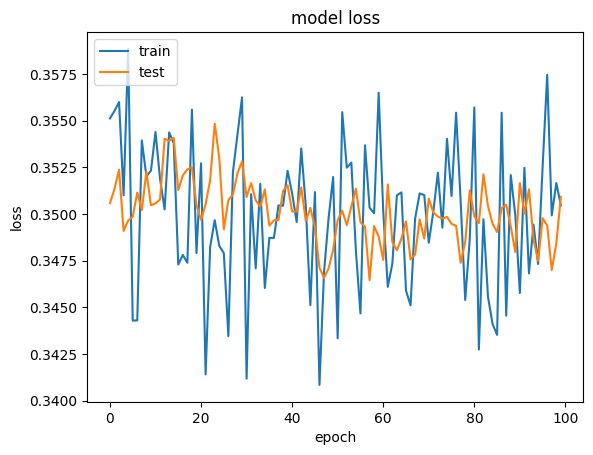

In [ ]:
#Loss Graph

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

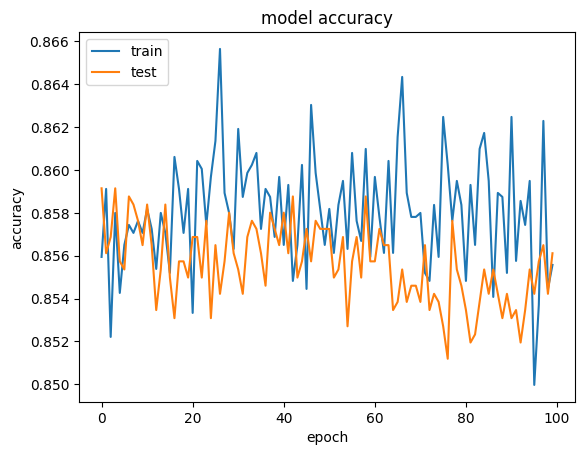

In [ ]:
#Accuracy graph

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#making predictions and evaluating the model

#predicting the tese set result

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Accuracy score
accuracy_score(y_test, y_pred)

[[1551   56]
 [ 223  170]]


0.8605

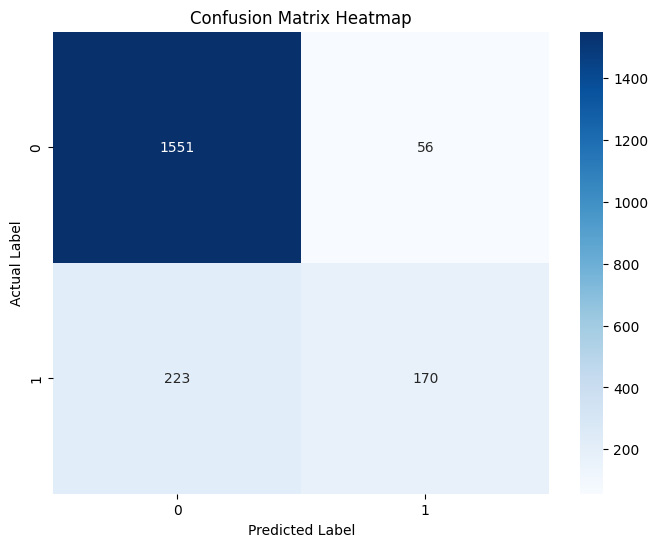

In [ ]:
import seaborn as sns

# Create heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Example unknown value (replace with your actual values)
unknown_value = {
    # 'CreditScore': 699,
    # 'Gender': 'Female',
    # 'Age': 39,
    # 'Tenure': 1,
    # 'Balance': 0,
    # 'NumOfProducts':2,
    # 'HasCrCard': 0,
    # 'IsActiveMember': 0,
    # 'EstimatedSalary': 93826.63,
    # 'Geography': 'France'
    'CreditScore': 502,
    'Gender': 'Female',
    'Age': 42,
    'Tenure': 8,
    'Balance': 159660.8,
    'NumOfProducts': 3,
    'HasCrCard': 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 113931.57,
    'Geography': 'France'
}

# Convert the unknown value to a DataFrame
unknown_df = pd.DataFrame([unknown_value])

# Preprocess the unknown value
# Scale numerical features
unknown_df[numerical_cols] = scaler.transform(unknown_df[numerical_cols])

# Encode categorical features (Geography)
unknown_df = pd.get_dummies(unknown_df, columns=['Geography'])

# Ensure all geography columns are present, even if the unknown value's geography is not in the training data
for col in ['Geography_France', 'Geography_Germany', 'Geography_Spain']:
    if col not in unknown_df.columns:
        unknown_df[col] = 0

# Apply label encoding to Gender and the geography columns
unknown_df['Gender'] = le.transform(unknown_df['Gender'])
unknown_df['Geography_France'] = le.transform(unknown_df['Geography_France'])
unknown_df['Geography_Germany'] = le.transform(unknown_df['Geography_Germany'])
unknown_df['Geography_Spain'] = le.transform(unknown_df['Geography_Spain'])


# Reorder columns to match the training data if necessary (this is important!)
# You might need to get the order of columns from your training data (x_train.columns)
unknown_df = unknown_df[x_train.columns]

# Make a prediction
prediction = classifier.predict(unknown_df)

# The prediction is a probability. You can convert it to a class label (0 or 1)
predicted_class = (prediction >= 0.5).astype(int)

print(f"The predicted probability of churn is: {prediction[0][0]:.4f}")
print(f"The predicted class (0=No Churn, 1=Churn) is: {predicted_class[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The predicted probability of churn is: 0.9996
The predicted class (0=No Churn, 1=Churn) is: 1


In [ ]:
#Saving model to drive

from tensorflow.keras.models import load_model

classifier.save('/content/drive/MyDrive/Trained Models/ANN_model_for_Bank_leaving_prediction.h5')
# classifier.save('/content/drive/MyDrive/Data Sets/Churn_Modelling.h5')

In [ ]:
# Based on the problem you're trying to solve (predicting customer churn, which is a binary classification task), using a Sequential model with Dense layers and a sigmoid activation in the output layer is a suitable approach. The dataset you have is also appropriate for training such a model.

# However, whether it's the "right" model depends on various factors, including the desired performance, interpretability, and computational resources. While your current model is a good starting point, here are some alternative models you could consider for this type of binary classification problem:

# Logistic Regression: A simpler linear model that can be a good baseline.
# Support Vector Machines (SVM): Effective for high-dimensional data and can use different kernels.
# Random Forest: An ensemble method that can handle non-linear relationships and is less prone to overfitting.
# Gradient Boosting Machines (e.g., XGBoost, LightGBM): Powerful algorithms that often achiAeve high accuracy.
# To determine if these alternatives are "better," you would need to train and evaluate them on your dataset and compare their performance metrics (e.g., accuracy, precision, recall, F1-score) to your current model.

#Using decision tree of tensor flow

In [ ]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import pandas as pd

try:
  loaded_model = tf.keras.layers.TFSMLayer('/content/drive/MyDrive/Trained Models/Random_forest_model_for_Bank_leaving_prediction', call_endpoint='serving_default')
  model = loaded_model
  print("Model loaded successfully using TFSMLayer.")
except Exception as e:
  print(f"Could not load the model with TFSMLayer: {e}")
  print("Building and training a new model.")
  # Build a Random Forest model
  # You can also try GradientBoostedTreesModel
  model = tfdf.keras.RandomForestModel(verbose=2)

  # Concatenate features and labels for tfdf
  train_df_tfdf = pd.concat([x_train, y_train], axis=1)
  test_df_tfdf = pd.concat([x_test, y_test], axis=1)


  # Convert Pandas DataFrames to TensorFlow Datasets
  train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df_tfdf, label=y_train.name)
  test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df_tfdf, label=y_test.name)


  # Train the model
  model.fit(train_ds)

  # Evaluate the model on the test set
  evaluation = model.evaluate(test_ds, return_dict=True)

  print("Random Forest Model Evaluation Results:")
  print(evaluation)

  # Make predictions
  y_pred_tfdf = model.predict(test_ds)

  # The output of predict for binary classification is typically the probability of the positive class (class 1)
  # We'll convert probabilities to class labels (0 or 1) for comparison with y_test
  predicted_classes_tfdf = (y_pred_tfdf >= 0.5).astype(int)

Model loaded successfully using TFSMLayer.


In [ ]:
# Example unknown value (replace with your actual values)
unknown_value_rf = {
    'CreditScore': 502,
    'Gender': 'Female',
    'Age': 42,
    'Tenure': 8,
    'Balance': 159660.8,
    'NumOfProducts': 3,
    'HasCrCard': 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 113931.57,
    'Geography': 'France'
}

# Convert the unknown value to a DataFrame
unknown_df_rf = pd.DataFrame([unknown_value_rf])

# Preprocess the unknown value
# Scale numerical features
unknown_df_rf[numerical_cols] = scaler.transform(unknown_df_rf[numerical_cols])

# Encode categorical features (Geography)
unknown_df_rf = pd.get_dummies(unknown_df_rf, columns=['Geography'])

# Ensure all geography columns are present, even if the unknown value's geography is not in the training data
for col in ['Geography_France', 'Geography_Germany', 'Geography_Spain']:
    if col not in unknown_df_rf.columns:
        unknown_df_rf[col] = 0

# Apply label encoding to Gender and the geography columns
unknown_df_rf['Gender'] = le.transform(unknown_df_rf['Gender'])
unknown_df_rf['Geography_France'] = le.transform(unknown_df_rf['Geography_France'])
unknown_df_rf['Geography_Germany'] = le.transform(unknown_df_rf['Geography_Germany'])
unknown_df_rf['Geography_Spain'] = le.transform(unknown_df_rf['Geography_Spain'])

# Reorder columns to match the training data (x_train.columns)
unknown_df_rf = unknown_df_rf[x_train.columns]

# Convert the preprocessed DataFrame to a dictionary of tensors for prediction
unknown_input_data = {name: tf.constant(np.array(unknown_df_rf[name]).astype(x_train[name].dtype)) for name in unknown_df_rf.columns}

# Make a prediction
# Despite previous errors, trying to pass the dictionary to 'inputs' again
# If this continues to fail, refer to tensorflow_decision_forests documentation for TFSMLayer input format with SavedModels
prediction_rf = model(inputs=unknown_input_data)


# The output of predict for binary classification is typically the probability of the positive class (class 1)
# We'll convert probabilities to class labels (0 or 1)
predicted_class_rf = (prediction_rf >= 0.5).numpy().astype(int)

print(f"The predicted probability of churn is: {prediction_rf.numpy()[0][0]:.4f}")
print(f"The predicted class (0=No Churn, 1=Churn) is: {predicted_class_rf[0][0]}")

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_classes_tfdf))
print("Accuracy Score:", accuracy_score(y_test, predicted_classes_tfdf))


Confusion Matrix:
[[1545   62]
 [ 205  188]]
Accuracy Score: 0.8665


In [ ]:
#saving random forest model to drive

from tensorflow.keras.models import load_model

# model.save('/content/drive/MyDrive/Trained Models/Random_forest_model_for_Bank_leaving_prediction.hdf5')


model.save('/content/drive/MyDrive/Trained Models/Random_forest_model_for_Bank_leaving_prediction', save_format='tf')
